<h1>Scraping and Analyzing Basketball Statistics with Python Basics</h1>
<h2>Description</h2>


I wanted to test some basic python skills, so I used web scraping. Web scraping involves extracting data from websites. In this assignment, I web scraped basketball statistics from Wikipedia of some of the greatest basketball players. I performed some analysis on the data using Pandas, plot, data answer some basic questions. 

The players I used are Michael Jordan , Kobe Bryant, Lebron James and Stephen Curry.

<h2>Define a Web Scraping Function</h2>

In this section, we define the function get_basketball_stats. The function will return a dictionary corresponding to the Regular season statistics of each basketball player scraped from m en.wikipedia.org. The Formal Parameter or input  link is going to be the URL of the Wikipedia page for each player. This function will return a Python dictionary. The keys will be the column names, and the values will be a list that contains a different columns; the element of each list will be a separate row for that column. 

In [5]:
import bs4
import requests
import pandas as pd
import numpy as np

In [6]:
def get_basketball_stats(link='https://en.wikipedia.org/wiki/Michael_Jordan'):
    # read the webpage 
    response = requests.get(link)
    # create a BeautifulSoup object to parse the HTML  
    soup = bs4.BeautifulSoup(response.text, 'html.parser')
    # the player stats are defined  with the attribute CSS class set to 'wikitable sortable'; 
    #therefore we create a tag object "table"
    table=soup.find(class_='wikitable sortable')

    #the headers of the table are the first table row (tr) we create a tag object that has the first row  
    headers=table.tr
    #the table column names are displayed  as an abbreviation; therefore we find all the abbr tags and returs an Iterator
    titles=headers.find_all("abbr")
    #we create a dictionary  and pass the table headers as the keys 
    data = {title['title']:[] for title in titles}
   #we will store each column as a list in a dictionary, the header of the column will be the dictionary key 

    #we iterate over each table row by fining each table tag tr and assign it to the objed
    for row in table.find_all('tr')[1:]:
    
        #we iterate over each cell in the table, as each cell corresponds to a different column we all obtain the correspondin key corresponding the column n 
        for key,a in zip(data.keys(),row.find_all("td")[2:]):
            # we append each elment and strip any extra HTML contnet 
            data[key].append(''.join(c for c in a.text if (c.isdigit() or c == ".")))

    # we remove extra rows by finding the smallest list     
    Min=min([len(x)  for x in data.values()])
    #we convert the elements in the key to floats 
    for key in data.keys():
    
        data[key]=list(map(lambda x: float(x), data[key][:Min]))
       
    return data

<h2>Question 1: Web Scraping the data and Converting to Pandas Dataframe</h2>

For this question, I used the function get_basketball_stats to extract a Python Dictionary of the player statistics, convert the dictionary to a Python Dataframe. To get full marks, I displayed the first five rows of the dataframe for each player using the method head with the name of each player printed above. I used the following libraries. 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

The list links contain the link the Wikipedia article for each player. The list names contains the names of each player.

In [8]:
links=['https://en.wikipedia.org/wiki/Michael_Jordan'\
       ,'https://en.wikipedia.org/wiki/Kobe_Bryant'\
      ,'https://en.wikipedia.org/wiki/LeBron_James'\
      ,'https://en.wikipedia.org/wiki/Stephen_Curry']

names=['Michael Jordan','Kobe Bryant','Lebron James','Stephen Curry']

For each Player I created a Python dictionary from the table Regular season table. 

In [9]:
michael_jordan_dict=get_basketball_stats(links[0])
kobe_bryant_dict=get_basketball_stats(links[1])
lebron_james_dict=get_basketball_stats(links[2])
stephen_curry_dict=get_basketball_stats(links[3])

For each Player convert the Python Dictionary to a Pandas Dataframe using the constructor <b>pd.DataFrame()</b>

In [10]:
mj=pd.DataFrame(michael_jordan_dict)
kb=pd.DataFrame(kobe_bryant_dict)
lj=pd.DataFrame(lebron_james_dict)
sc=pd.DataFrame(stephen_curry_dict)

For each player display the first five rows of the Dataframe, I printed the name of each Player above the Dataframe.
I performed the process in a loop, so I had to use the function display as follows:

<b>display(df)</b>

In [11]:
lists=[mj,kb,lj,sc]

a = 0
for name in names:
    print(name)
    display(lists[a].head())
    a + 1  

Michael Jordan


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,82.0,82.0,38.3,0.515,0.173,0.845,6.5,5.9,2.4,0.8,28.2
1,18.0,7.0,25.1,0.457,0.167,0.840,3.6,2.9,2.1,1.2,22.7
2,82.0,82.0,40.0,0.482,0.182,0.857,5.2,4.6,2.9,1.5,37.1
3,82.0,82.0,40.4,0.535,0.132,0.841,5.5,5.9,3.2,1.6,35.0
4,81.0,81.0,40.2,0.538,0.276,0.850,8.0,8.0,2.9,0.8,32.5


Kobe Bryant


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,82.0,82.0,38.3,0.515,0.173,0.845,6.5,5.9,2.4,0.8,28.2
1,18.0,7.0,25.1,0.457,0.167,0.840,3.6,2.9,2.1,1.2,22.7
2,82.0,82.0,40.0,0.482,0.182,0.857,5.2,4.6,2.9,1.5,37.1
3,82.0,82.0,40.4,0.535,0.132,0.841,5.5,5.9,3.2,1.6,35.0
4,81.0,81.0,40.2,0.538,0.276,0.850,8.0,8.0,2.9,0.8,32.5


Lebron James


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,82.0,82.0,38.3,0.515,0.173,0.845,6.5,5.9,2.4,0.8,28.2
1,18.0,7.0,25.1,0.457,0.167,0.840,3.6,2.9,2.1,1.2,22.7
2,82.0,82.0,40.0,0.482,0.182,0.857,5.2,4.6,2.9,1.5,37.1
3,82.0,82.0,40.4,0.535,0.132,0.841,5.5,5.9,3.2,1.6,35.0
4,81.0,81.0,40.2,0.538,0.276,0.850,8.0,8.0,2.9,0.8,32.5


Stephen Curry


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,82.0,82.0,38.3,0.515,0.173,0.845,6.5,5.9,2.4,0.8,28.2
1,18.0,7.0,25.1,0.457,0.167,0.840,3.6,2.9,2.1,1.2,22.7
2,82.0,82.0,40.0,0.482,0.182,0.857,5.2,4.6,2.9,1.5,37.1
3,82.0,82.0,40.4,0.535,0.132,0.841,5.5,5.9,3.2,1.6,35.0
4,81.0,81.0,40.2,0.538,0.276,0.850,8.0,8.0,2.9,0.8,32.5


<h2>Question 2: Plot the Points per game for a player using the function plt.plot()</h2>

Import the plotting library

In [12]:
import matplotlib.pyplot as plt

Using the function <b>plt.plot()</b> plot the Points per game, for one player.

Text(0, 0.5, 'Points per game')

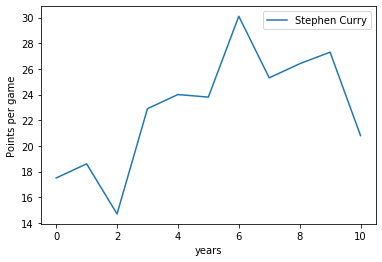

In [20]:
plt.plot(lists[3][['Points per game']],label=name)
plt.legend()
plt.xlabel('years')
plt.ylabel('Points per game')